In [6]:
import pandas as pd

file_path = "/Volumes/data_files/markov_codes/dates/S4_Centrality_Metrics.xlsx"
df = pd.read_excel(file_path)

degree_centrality_df = df[df['Centrality type']=="Degree  Centrality"]
eigenvector_centrality_df = df[df['Centrality type'] == "Eigenvector Centrality"]
betwenness_centrality_df = df[df['Centrality type'] == "Betweenness  Centrality"]
closeness_centrality_df = df[df['Centrality type'] == "Closeness Centrality"]
in_degree_df = df[df['Centrality type'] == "In Degree"]
out_degree_df = df[df['Centrality type'] == "Out Degree"]

degree_centrality_df = degree_centrality_df.drop(['Cancer'], axis=1)
eigenvector_centrality_df = eigenvector_centrality_df.drop(['Cancer'],axis=1)
betwenness_centrality_df = betwenness_centrality_df.drop(['Cancer'],axis=1)
closeness_centrality_df = closeness_centrality_df.drop(['Cancer'],axis=1)
in_degree_df = in_degree_df.drop(['Cancer'],axis=1)
out_degree_df = out_degree_df.drop(['Cancer'],axis=1)

In [7]:
import pandas as pd

def get_top5_infections(df, cancer_list, top_n=5):

    disease_cols = [col for col in df.columns if col not in ['Centrality type', 'Cancer Type']]
    results = []

    for cancer in cancer_list:
        row = df[df['Cancer Type'] == cancer]
        if row.empty:
            continue 

        disease_values = row[disease_cols].T.reset_index()
        disease_values.columns = ['Disease', 'Centrality_Value']

        top_diseases = disease_values.sort_values(by='Centrality_Value', ascending=False).head(top_n)
        top_diseases['Cancer Type'] = cancer

        results.append(top_diseases)

    result_df = pd.concat(results, ignore_index=True)
    result_df = result_df[['Cancer Type', 'Disease', 'Centrality_Value']]
    return result_df

In [8]:
# 定义癌症列表
cancer_list = ['Colorectal Cancer', 'Esophageal Cancer', 'Liver Cancer', 'Gastric Cancer', 'Pancreatic Cancer']

# 获取每种 centrality 对应的前5感染疾病
top5_in_degree = get_top5_infections(in_degree_df, cancer_list)
top5_out_degree = get_top5_infections(out_degree_df, cancer_list)
top5_degree = get_top5_infections(degree_centrality_df, cancer_list)
top5_betweenness = get_top5_infections(betwenness_centrality_df, cancer_list)
top5_closeness = get_top5_infections(closeness_centrality_df, cancer_list)
top5_eigenvector = get_top5_infections(eigenvector_centrality_df, cancer_list)


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

def plot_top5_centrality(top5_df, group_colors, value_col='Centrality_Value',
                         cancer_col='Cancer Type', disease_col='Disease',
                         figsize=(18,8), font_size=20, save_path=None,
                         title=None):
    # 按癌症类型和中心性排序
    df = top5_df.sort_values([cancer_col, value_col], ascending=[True, False]).reset_index(drop=True)

    x = np.arange(len(df))
    heights = df[value_col]
    bar_colors = df[cancer_col].map(group_colors)

    plt.figure(figsize=figsize)
    plt.grid(False)
    bars = plt.bar(x, heights, color=bar_colors, edgecolor='black', alpha=0.8)

    x_labels = df[disease_col]
    plt.xticks(x, x_labels, rotation=45, ha='right', fontsize=font_size)

    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                 f'{bar.get_height():.3f}', ha='center', va='bottom', fontsize=font_size-4,rotation=45,)

    plt.ylabel(title, fontsize=font_size)
    plt.yticks(fontsize=font_size)

    legend_elements = [Patch(facecolor=color, edgecolor='black', label=cancer)
                       for cancer, color in group_colors.items()]
    # plt.legend(
    #     handles=legend_elements,
    #     title='Cancer Type',
    #     loc='upper right',
    #     fontsize=font_size-4,
    #     title_fontsize=font_size-2,
    #     frameon=True
    # )

    plt.legend(handles=legend_elements, title='Cancer Type', bbox_to_anchor=(1.01, 1), loc='upper left',       fontsize=font_size-1,
    title_fontsize=font_size,)


    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()

    if save_path is not None:
        plt.savefig(save_path, format='pdf', bbox_inches='tight')

    plt.show()

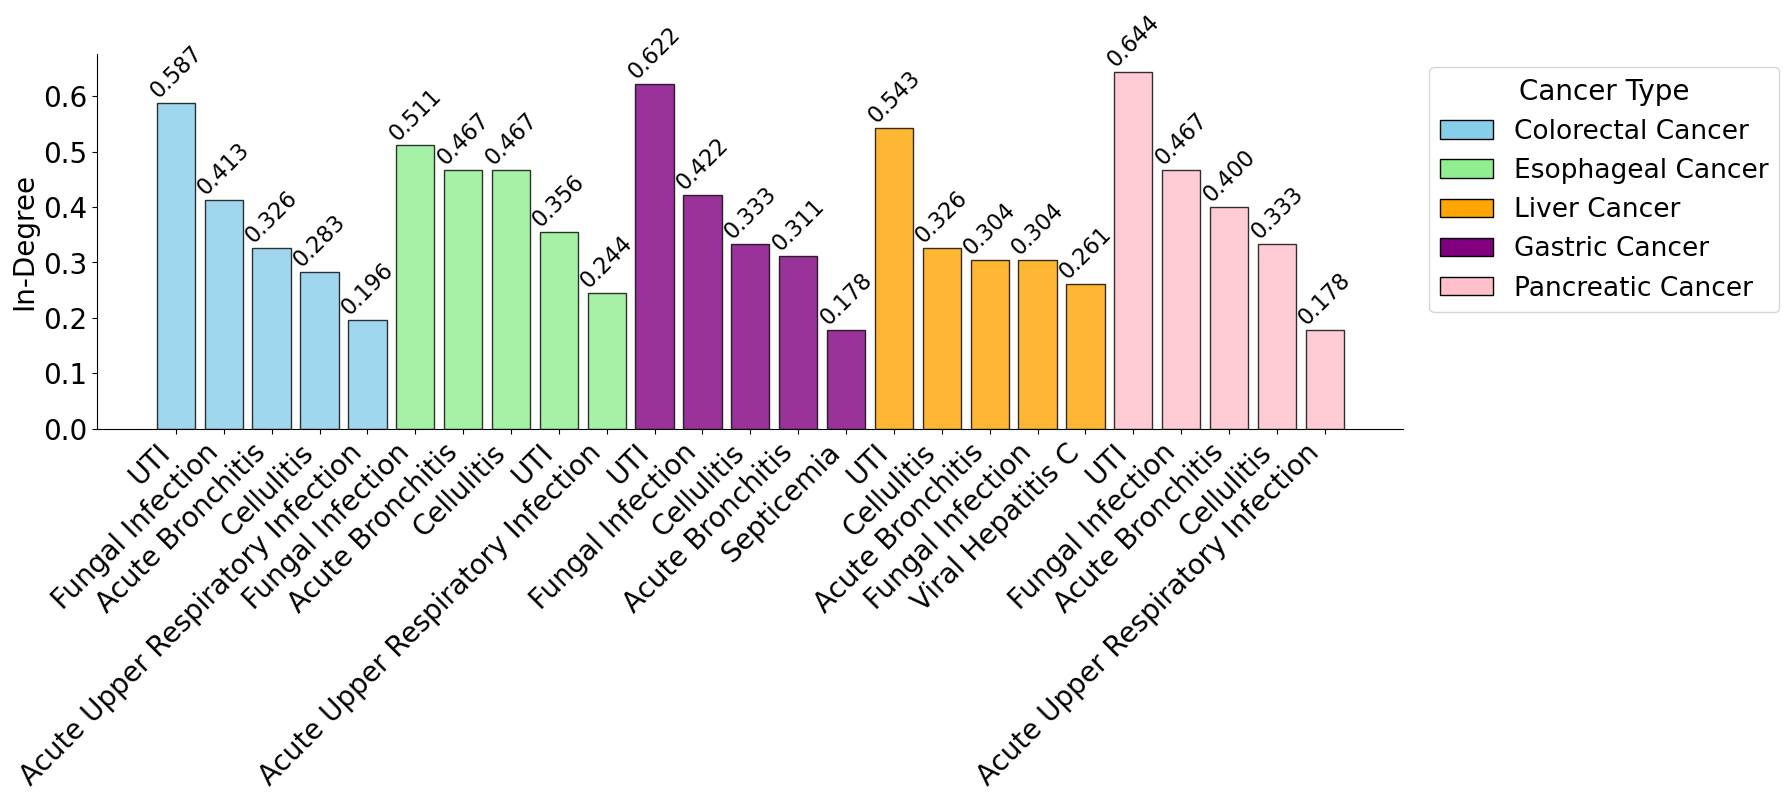

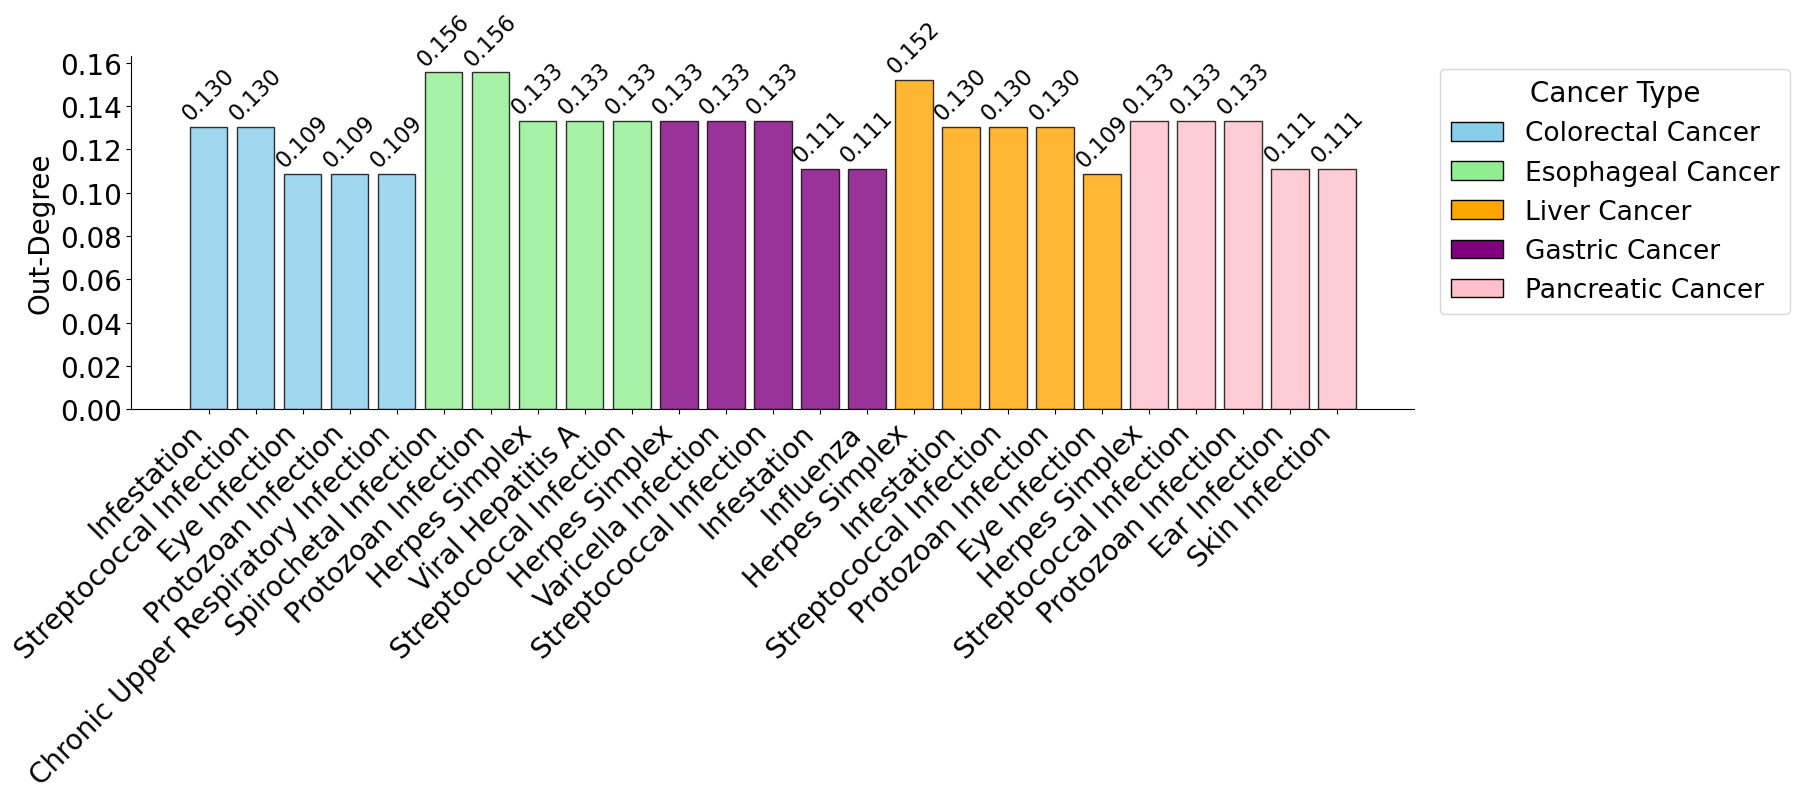

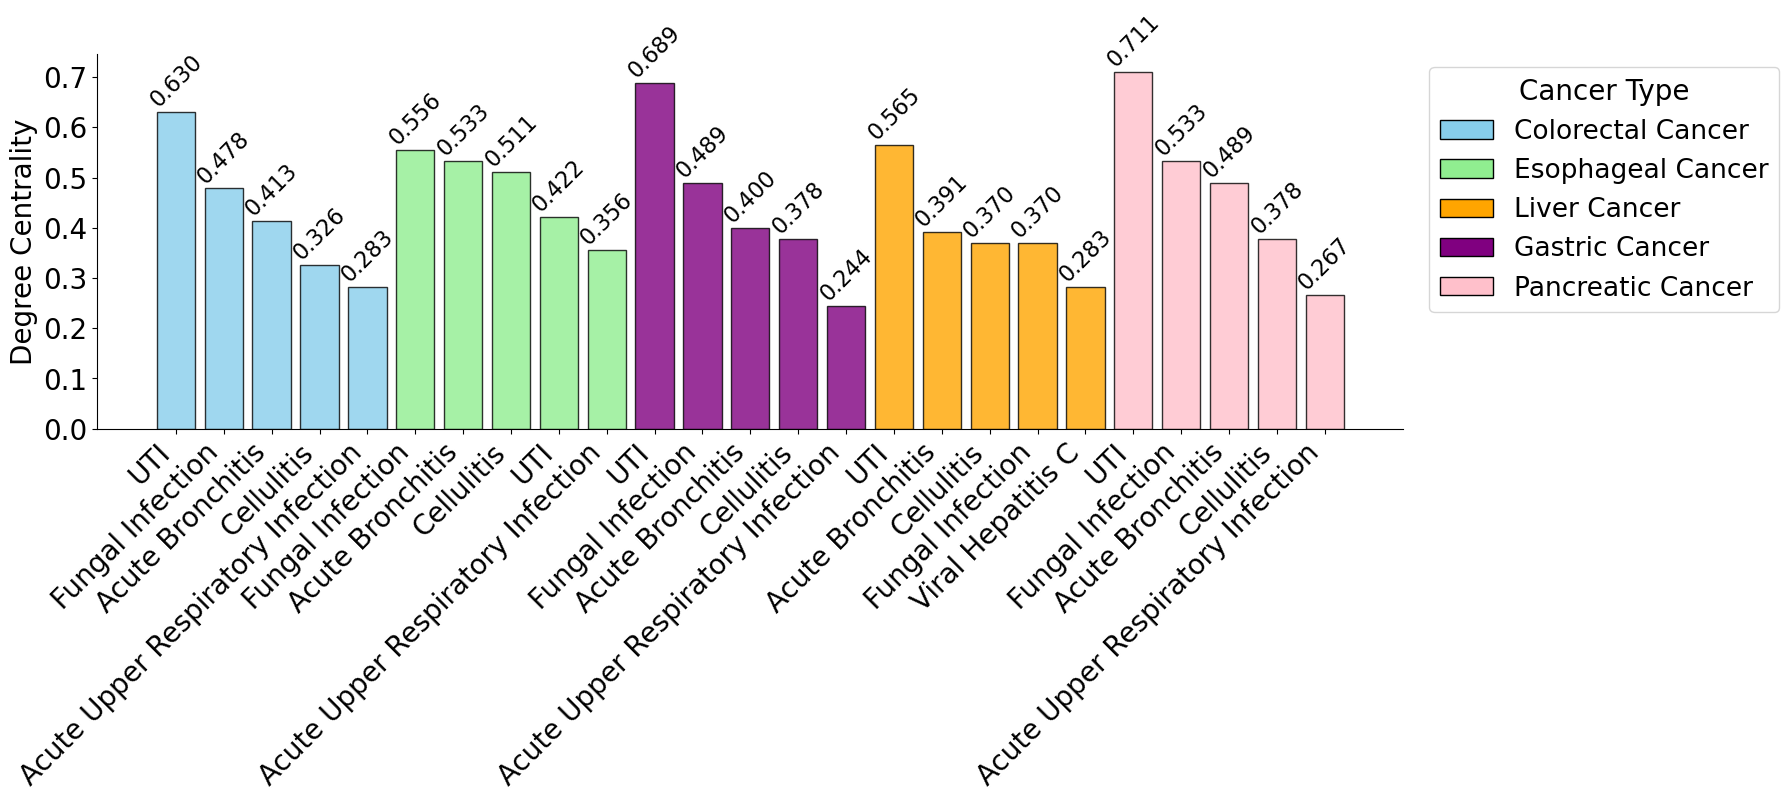

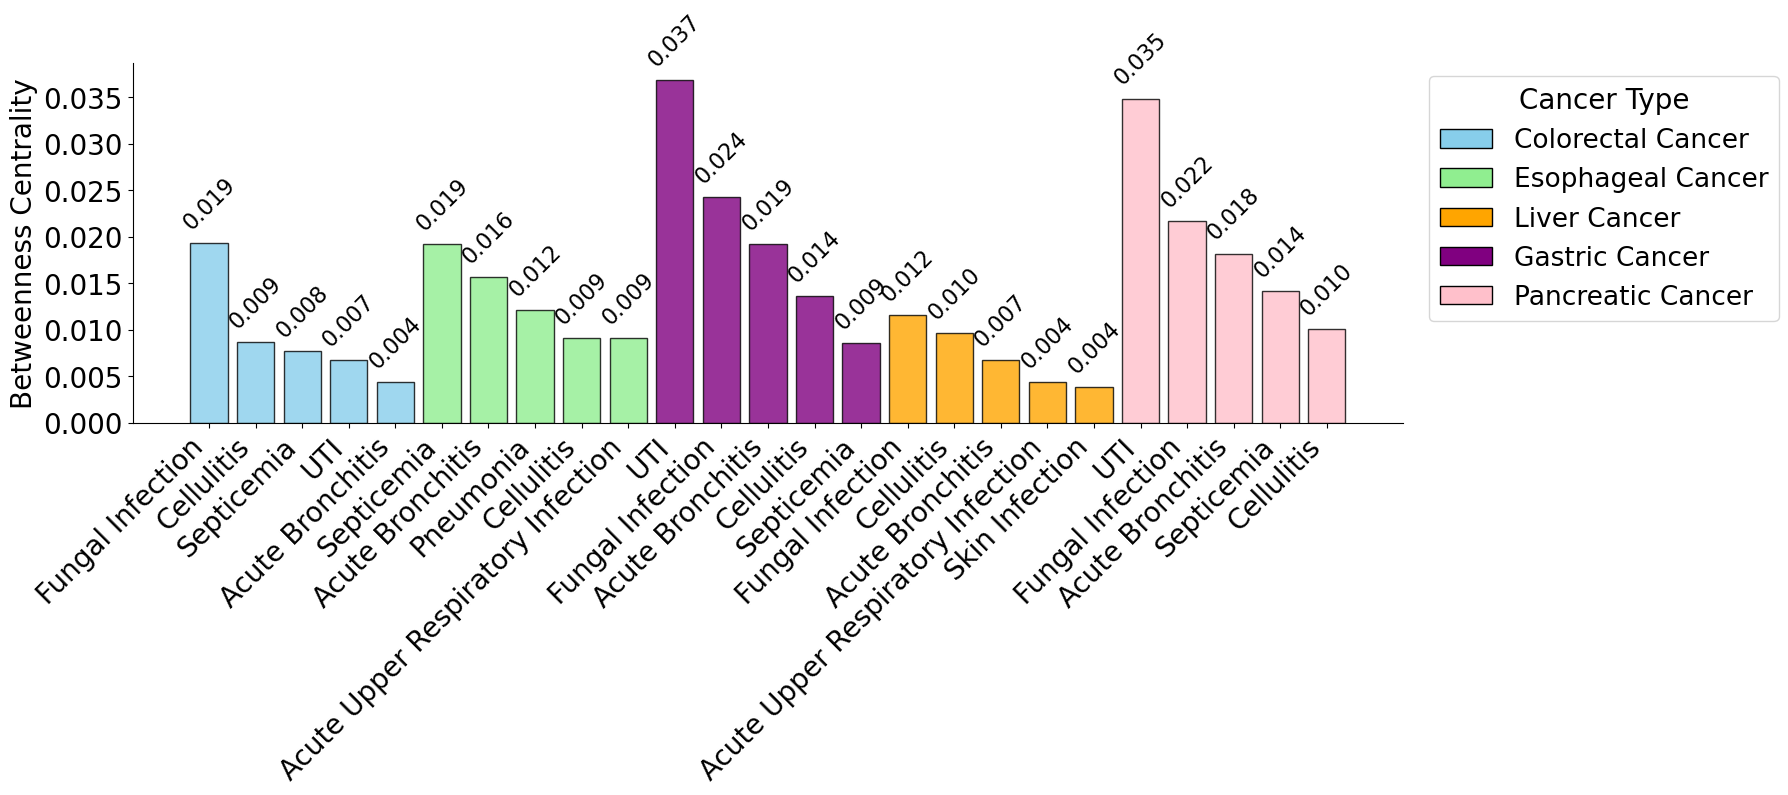

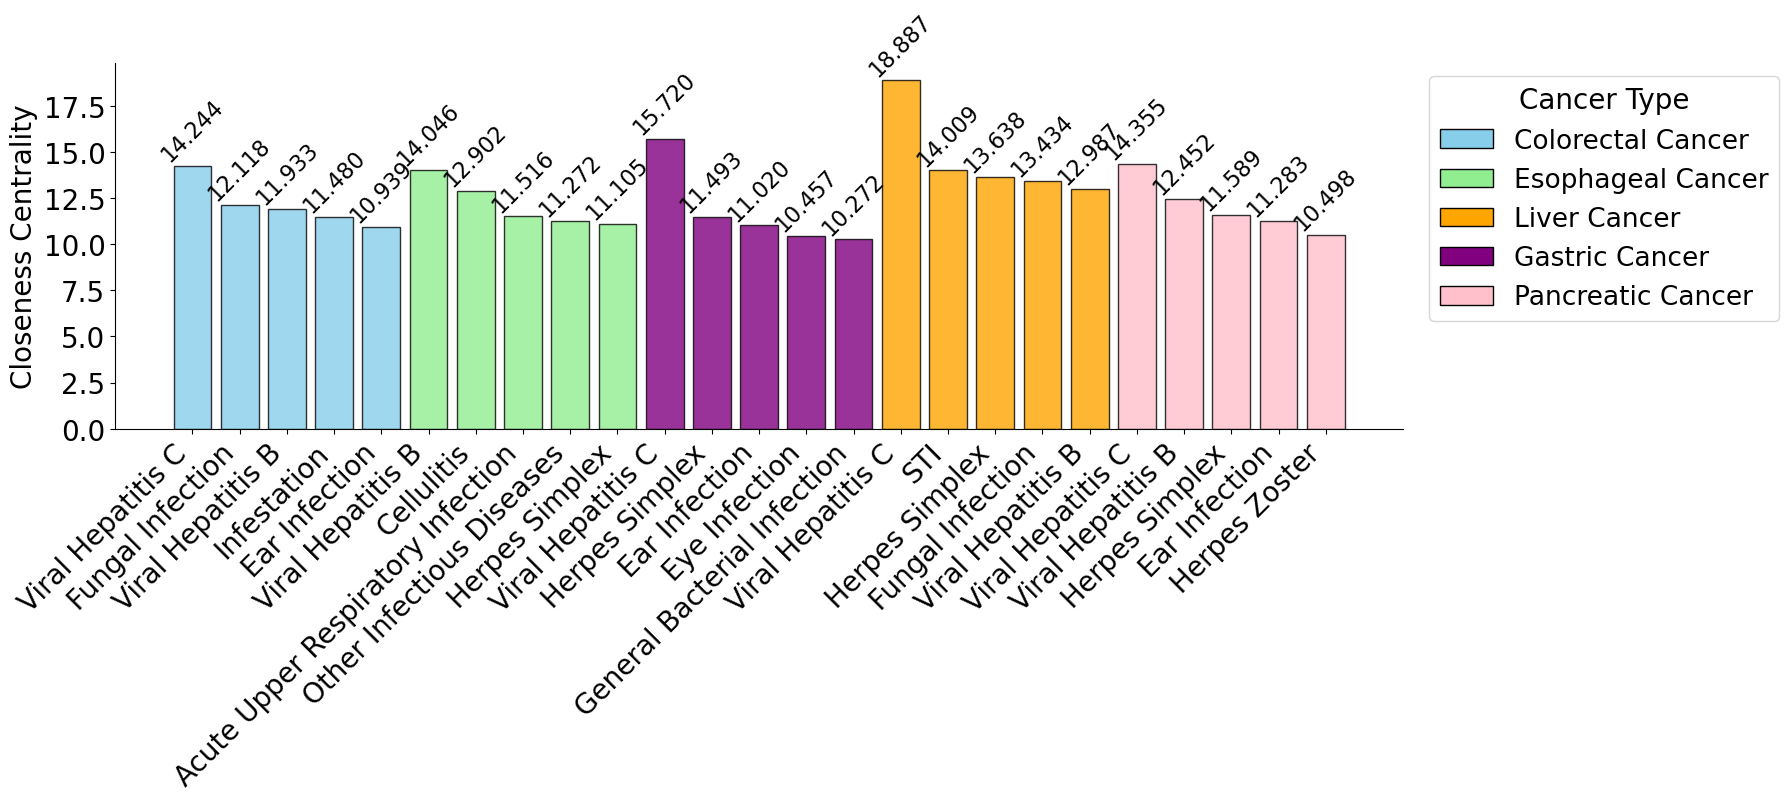

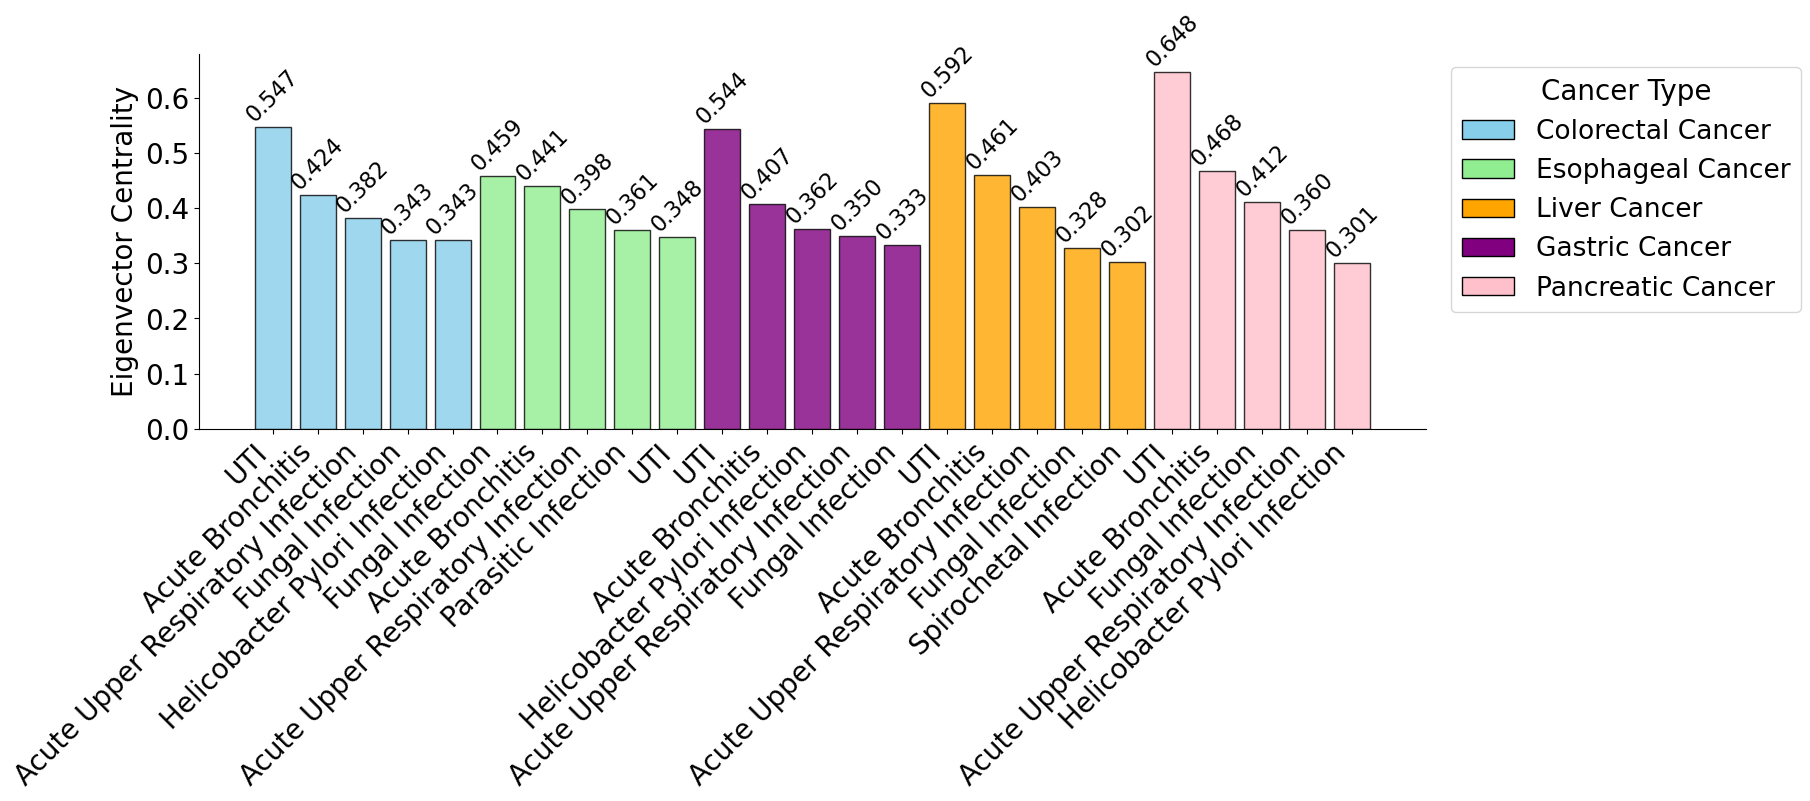

In [11]:
# 定义颜色
group_colors = {
    'Colorectal Cancer': 'skyblue',
    'Esophageal Cancer': 'lightgreen',
    'Liver Cancer': 'orange',
    'Gastric Cancer': 'purple',
    'Pancreatic Cancer': 'pink'
}

plot_top5_centrality(top5_in_degree, group_colors,
                     title = "In-Degree",
                     save_path = "top5_in_degree.pdf")

plot_top5_centrality(top5_out_degree,group_colors,
                     title = "Out-Degree",
                     save_path = "top5_out_degree.pdf")

plot_top5_centrality(top5_degree,group_colors,
                     title = "Degree Centrality",
                     save_path="top5_degree.pdf")

plot_top5_centrality(top5_betweenness,group_colors,
                     title = "Betweenness Centrality",
                     save_path="top5_betweenness.pdf")

plot_top5_centrality(top5_closeness,group_colors,
                     title = "Closeness Centrality",
                     save_path="top5_closeness.pdf")

plot_top5_centrality(top5_eigenvector, group_colors,
                     title="Eigenvector Centrality",
                     save_path="top5_eigenvector.pdf")


